# Arknights Web Scraping

<b>Author:<b/> <a href="https://github.com/sdkvictor">sdkvictor<a/>

<b>Last update:<b/> 6/26/2022

In [1]:
# !pip install -U selenium

In [2]:
# !pip install webdriver-manager

## Setup for Selenium

In [3]:
import selenium
selenium.__version__

'4.3.0'

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [5]:
chrome_options = webdriver.ChromeOptions()
chrome_options.binary_location = "C:/Program Files/Google/Chrome Beta/Application/chrome.exe"

In [6]:
service = Service(executable_path="D:/chromedriver.exe")
driver = webdriver.Chrome(options=chrome_options, service=service)

## Getting data from main page

In [7]:
# Access the main page
driver.get("https://gamepress.gg/arknights/tools/interactive-operator-list#tags=null##cn##stats")

In [8]:
from selenium.webdriver.common.by import By

In [9]:
#Get the list of operators
operator_list = driver.find_element(By.ID, "operators-list")

In [10]:
#Extract the values of the operators list
operators = operator_list.find_elements(By.CLASS_NAME, "operators-row")

In [11]:
len(operators)

248

### Initializing the Dataframe

In [12]:
import pandas as pd

In [13]:
#Create the dataframe
df = pd.DataFrame(columns = ['Operator Name', 'Class', 'Rarity',  'Gender', 'Place of Birth', 'Birthday', 'Race', 'Height', 'Combat Experience', 'Infection Status', 'Artist', 'CV', 'CV (CN)', 'Nation', 'Team', 'Group', 'Release Status','Operator Page'])

In [14]:
# Fill the dataframe with the data available on the main page

for operator in operators:
    operator_cell = operator.find_element(By.CLASS_NAME, 'operator-cell')
    operator_title = operator_cell.find_element(By.CLASS_NAME, 'operator-title')
    operator_title_actual = operator_title.find_element(By.CLASS_NAME, 'operator-title-actual')
    operator_url =  operator_title_actual.get_attribute('href')

    #Get Operator Name
    name_val = operator.get_attribute("data-name")
    #Get Class
    class_val = operator.get_attribute("data-profession")
    #Get Rarity
    rarity_val = operator.get_attribute("data-rarity")
    #Get Release Status
    release_val = operator.get_attribute("data-availserver")
    #Get URL of the Operator's Page
    page_val = operator_url
    
    #Add Operator to the dataframe
    df = df.append({'Operator Name': name_val, 'Class': class_val, 'Rarity': rarity_val, 'Release Status': release_val, 'Operator Page': page_val}, ignore_index = True)


In [15]:
# backup
initial_df = df.copy()

## Getting data from each operator page

In [16]:
df = initial_df.copy()


#Classify every relevant column
relevant_columns = {'Artist', 'CV', 'CV (CN)', 'Gender', 'Place of Birth', 'Race', 'Birthday', 'Height', 'Combat Experience', 'Infection Status', 'Nation', 'Team', 'Group'}
url_columns = { 'Artist', 'CV', 'CV (CN)', 'Gender', 'Race'}
icon_columns = { 'Nation', 'Team' }

#iterate through the dataframe
for i, row in df.iterrows():
    unique_id = i
    #Access the operator's page
    driver.get(row['Operator Page'])
    try:
        #Get the relevant values from the operator's profile table
        profile_cell = driver.find_element(By.CLASS_NAME, 'profile-info-table.upgrade-cost-table')
        for table in profile_cell.find_elements(By.TAG_NAME, 'table'):
            for row in table.find_elements(By.TAG_NAME, 'tr'):
                column = row.find_element(By.TAG_NAME, 'th').text
                if(column in relevant_columns):
                    value = ''
                    if column in url_columns:
                        #get from a
                        try:
                            value = row.find_element(By.TAG_NAME, 'td').find_element(By.TAG_NAME, 'a').text
                        except:
                            value = ''
                    elif column in icon_columns:
                        #ignore icon and get value
                        try:
                            value = row.find_element(By.TAG_NAME, 'td').find_element(By.CLASS_NAME, 'group-name').find_element(By.TAG_NAME, 'a').text
                        except:
                            value = ''
                    else:
                        #get from td value
                        try:
                            value = row.find_element(By.TAG_NAME, 'td').text
                        except:
                            value = ''

                    df.at[i, column] = value
    except:
        pass

In [17]:
#Display all columns
pd.set_option('max_columns', None)

df

,Operator Name,Class,Rarity,Gender,Place of Birth,Birthday,Race,Height,Combat Experience,Infection Status,Artist,CV,CV (CN),Nation,Team,Group,Release Status,Operator Page
0,Ebenholz,Caster,6,Male,莱塔尼亚,6月5日,Caprinae,173cm,没有战斗经验,参照医学检测报告，确认为感染者。,Ryuzakiichi,Unknown,澈洌,Leithanien,NaN,NaN,cn,https://gamepress.gg/arknights/operator/ebenholz
1,Lumen,Medic,6,Male,伊比利亚,6月12日,Ægir,177cm,没有战斗经验,参照医学检测报告，确认为非感染者。,一千,Unknown,孙晔,Iberia,NaN,NaN,cn,https://gamepress.gg/arknights/operator/lumen
2,Irene,Guard,6,Female,伊比利亚,1月3日,Liberi,156cm,五年,参照医学检测报告，确认为非感染者。,aZLing4,Unknown,刘雯,Iberia,NaN,NaN,cn,https://gamepress.gg/arknights/operator/irene
3,Specter the Unchained,Specialist,6,Female,阿戈尔,7月27日,Ægir,165cm,七年,体表无源石结晶分布，但参照医学检测报告，确认为感染者。 干员幽灵鲨的感染症状较为特殊，对其开...,Skade,Unknown,张安琪,Aegir,NaN,Abyssal,cn,https://gamepress.gg/arknights/operator/specte...
4,Horn,Defender,6,Female,维多利亚,11月1日,Lupo,168cm,九年,参照医学检测报告，确认为非感染者。,m9nokuro,Unknown,翁媛,Victoria,NaN,NaN,cn,https://gamepress.gg/arknights/operator/horn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Yato,Vanguard,2,Female,The Far East,May 14,Oni,161cm,8 years,Infection confirmed by medical examination.,Skade,Saki Fujita,侯小菲,Rhodes Island,Action 4,NaN,na,https://gamepress.gg/arknights/operator/yato
244,'Justice Knight',Sniper,1,Female,NaN,Jan 21,NaN,160cm,More than 4 years,NaN,NoriZC,Satsuki Yukino,大汪,Kazimierz,NaN,Pinus Sylvestris,na,https://gamepress.gg/arknights/operator/justic...
245,THRM-EX,Specialist,1,Male,NaN,Feb 15,NaN,160cm,Less than 1 year,NaN,TOKI,Hikaru Midorikawa,NaN,Rhodes Island,NaN,NaN,na,https://gamepress.gg/arknights/operator/thrm-ex
246,Castle-3,Guard,1,Male,NaN,Dec. 10,NaN,167cm,3 years,NaN,TOKI,Atsushi Abe,马洋,Rhodes Island,NaN,NaN,na,https://gamepress.gg/arknights/operator/castle-3


In [18]:
#Save csv
df.to_csv('arknights-operators.csv')

## Data cleaning

In [19]:
df['Infection Status'].unique()

array(['参照医学检测报告，确认为感染者。', '参照医学检测报告，确认为非感染者。',
       '体表无源石结晶分布，但参照医学检测报告，确认为感染者。 干员幽灵鲨的感染症状较为特殊，对其开展的临床研究仍在继续。',
       'Originium crystals distributed across surface of body, confirmed Infected by medical examination.',
       'Medical tests have confirmed that no infection is present.',
       'Confirmed Infected by medical examination.',
       "Originium crystals are present on the body's surface, confirmed Infected by medical examination.",
       "Medical tests have confirmed that no infection is present. The following discussion summaries are all based upon observations and calculations of the person in question's cell proliferation status.",
       'Medical tests have confirmed that no infection is present. With her confirmation, all files pertaining to Gladiia have been moved to the high clearance database.',
       'Crystals have appeared on his body. Infection confirmed by medical examination.',
       'Crystals have appeared on her body. Infection confirmed by medical ex

In [20]:
#backup
original_df = df.copy()

In [44]:
#Get na releases
df = original_df
df_na = df[df['Release Status']=='na']
df_na

,Operator Name,Class,Rarity,Gender,Place of Birth,Birthday,Race,Height,Combat Experience,Infection Status,Artist,CV,CV (CN),Nation,Team,Group,Release Status,Operator Page
10,Flametail,Vanguard,6,Female,Kazimierz,Oct 8,Zalak,159cm,6 Years,Originium crystals distributed across surface ...,NoriZC,Aya Hirano,苏婉,Kazimierz,NaN,Pinus Sylvestris,na,https://gamepress.gg/arknights/operator/flametail
11,Nearl the Radiant Knight,Guard,6,Female,Kazimierz,Apr 23,Kuranta,171cm,8 Years,Medical tests have confirmed that no infection...,Ryuzakiichi,Ayane Sakura,穆雪婷,Kazimierz,NaN,NaN,na,https://gamepress.gg/arknights/operator/nearl-...
12,Fartooth,Sniper,6,Female,Kazimierz,Oct 10,Liberi,155cm,4 Years,Confirmed Infected by medical examination.,NoriZC,Suzuko Mimori,刘雯,Kazimierz,NaN,Pinus Sylvestris,na,https://gamepress.gg/arknights/operator/fartooth
13,Saileach,Vanguard,6,Female,Victoria,May 31,Vouivre,166cm,2 Years,Medical tests have confirmed that no infection...,Xiàyě Hóng Míng,Haruka Tomatsu,翁媛,Victoria,NaN,NaN,na,https://gamepress.gg/arknights/operator/saileach
14,Mizuki,Specialist,6,Male,Higashi,Mar 22,Ægir,161cm,None,Medical tests have confirmed that no infection...,Namie,Ayumu Murase,NaN,Higashi,NaN,NaN,na,https://gamepress.gg/arknights/operator/mizuki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Yato,Vanguard,2,Female,The Far East,May 14,Oni,161cm,8 years,Infection confirmed by medical examination.,Skade,Saki Fujita,侯小菲,Rhodes Island,Action 4,NaN,na,https://gamepress.gg/arknights/operator/yato
244,'Justice Knight',Sniper,1,Female,NaN,Jan 21,NaN,160cm,More than 4 years,NaN,NoriZC,Satsuki Yukino,大汪,Kazimierz,NaN,Pinus Sylvestris,na,https://gamepress.gg/arknights/operator/justic...
245,THRM-EX,Specialist,1,Male,NaN,Feb 15,NaN,160cm,Less than 1 year,NaN,TOKI,Hikaru Midorikawa,NaN,Rhodes Island,NaN,NaN,na,https://gamepress.gg/arknights/operator/thrm-ex
246,Castle-3,Guard,1,Male,NaN,Dec. 10,NaN,167cm,3 years,NaN,TOKI,Atsushi Abe,马洋,Rhodes Island,NaN,NaN,na,https://gamepress.gg/arknights/operator/castle-3


In [45]:
#Clean the infection status column to make it binary
matches = ['confirmed infected', 'infection confirmed', 'confirmed her infection', 'infection was confirmed', 'she is infected']

for i, row in df_na.iterrows():
    unique_id = i
    s = str(row['Infection Status']).lower()
    if any(x in s for x in matches):
        df_na.at[i, 'Infection Status'] = 'Infected'
    elif pd.notna(row['Infection Status']):
        df_na.at[i, 'Infection Status'] = 'Not Infected'

df_na['Infection Status'].unique()

array(['Infected', 'Not Infected', nan], dtype=object)

In [46]:
df_na

,Operator Name,Class,Rarity,Gender,Place of Birth,Birthday,Race,Height,Combat Experience,Infection Status,Artist,CV,CV (CN),Nation,Team,Group,Release Status,Operator Page
10,Flametail,Vanguard,6,Female,Kazimierz,Oct 8,Zalak,159cm,6 Years,Infected,NoriZC,Aya Hirano,苏婉,Kazimierz,NaN,Pinus Sylvestris,na,https://gamepress.gg/arknights/operator/flametail
11,Nearl the Radiant Knight,Guard,6,Female,Kazimierz,Apr 23,Kuranta,171cm,8 Years,Not Infected,Ryuzakiichi,Ayane Sakura,穆雪婷,Kazimierz,NaN,NaN,na,https://gamepress.gg/arknights/operator/nearl-...
12,Fartooth,Sniper,6,Female,Kazimierz,Oct 10,Liberi,155cm,4 Years,Infected,NoriZC,Suzuko Mimori,刘雯,Kazimierz,NaN,Pinus Sylvestris,na,https://gamepress.gg/arknights/operator/fartooth
13,Saileach,Vanguard,6,Female,Victoria,May 31,Vouivre,166cm,2 Years,Not Infected,Xiàyě Hóng Míng,Haruka Tomatsu,翁媛,Victoria,NaN,NaN,na,https://gamepress.gg/arknights/operator/saileach
14,Mizuki,Specialist,6,Male,Higashi,Mar 22,Ægir,161cm,None,Not Infected,Namie,Ayumu Murase,NaN,Higashi,NaN,NaN,na,https://gamepress.gg/arknights/operator/mizuki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Yato,Vanguard,2,Female,The Far East,May 14,Oni,161cm,8 years,Infected,Skade,Saki Fujita,侯小菲,Rhodes Island,Action 4,NaN,na,https://gamepress.gg/arknights/operator/yato
244,'Justice Knight',Sniper,1,Female,NaN,Jan 21,NaN,160cm,More than 4 years,NaN,NoriZC,Satsuki Yukino,大汪,Kazimierz,NaN,Pinus Sylvestris,na,https://gamepress.gg/arknights/operator/justic...
245,THRM-EX,Specialist,1,Male,NaN,Feb 15,NaN,160cm,Less than 1 year,NaN,TOKI,Hikaru Midorikawa,NaN,Rhodes Island,NaN,NaN,na,https://gamepress.gg/arknights/operator/thrm-ex
246,Castle-3,Guard,1,Male,NaN,Dec. 10,NaN,167cm,3 years,NaN,TOKI,Atsushi Abe,马洋,Rhodes Island,NaN,NaN,na,https://gamepress.gg/arknights/operator/castle-3


In [40]:
#Save na csv
df_na.to_csv('arknights-operators-na-infection')

In [42]:
#Save na excel
df_na.to_excel('arknights-operators-na-excel-1.xlsx')

In [47]:
#Get cn releases
df_cn = df[df['Release Status']=='cn']
df_cn

,Operator Name,Class,Rarity,Gender,Place of Birth,Birthday,Race,Height,Combat Experience,Infection Status,Artist,CV,CV (CN),Nation,Team,Group,Release Status,Operator Page
0,Ebenholz,Caster,6,Male,莱塔尼亚,6月5日,Caprinae,173cm,没有战斗经验,参照医学检测报告，确认为感染者。,Ryuzakiichi,Unknown,澈洌,Leithanien,NaN,NaN,cn,https://gamepress.gg/arknights/operator/ebenholz
1,Lumen,Medic,6,Male,伊比利亚,6月12日,Ægir,177cm,没有战斗经验,参照医学检测报告，确认为非感染者。,一千,Unknown,孙晔,Iberia,NaN,NaN,cn,https://gamepress.gg/arknights/operator/lumen
2,Irene,Guard,6,Female,伊比利亚,1月3日,Liberi,156cm,五年,参照医学检测报告，确认为非感染者。,aZLing4,Unknown,刘雯,Iberia,NaN,NaN,cn,https://gamepress.gg/arknights/operator/irene
3,Specter the Unchained,Specialist,6,Female,阿戈尔,7月27日,Ægir,165cm,七年,体表无源石结晶分布，但参照医学检测报告，确认为感染者。 干员幽灵鲨的感染症状较为特殊，对其开...,Skade,Unknown,张安琪,Aegir,NaN,Abyssal,cn,https://gamepress.gg/arknights/operator/specte...
4,Horn,Defender,6,Female,维多利亚,11月1日,Lupo,168cm,九年,参照医学检测报告，确认为非感染者。,m9nokuro,Unknown,翁媛,Victoria,NaN,NaN,cn,https://gamepress.gg/arknights/operator/horn
5,Fiammetta,Sniper,6,Female,拉特兰,4月3日,Liberi,171cm,四年,参照医学检测报告，确认为非感染者。,Huànxiàng Hēi Tù,Unknown,许潇文,Laterano,NaN,NaN,cn,https://gamepress.gg/arknights/operator/fiammetta
6,Goldenglow,Caster,6,Female,维多利亚,1月7日,Feline,159cm,NaN,参照医学检测报告，确认为感染者。,Namie,Unknown,白灯,Victoria,NaN,NaN,cn,https://gamepress.gg/arknights/operator/golden...
7,Lee,Specialist,6,Male,炎,10月25日,Lung,193cm,没有战斗经验（本人声称）,参照医学检测报告，确认为非感染者。,KuroBlood,Unknown,刘飞,Great Lungmen,Lee,NaN,cn,https://gamepress.gg/arknights/operator/lee
8,Ling,Supporter,6,Female,炎,3月3日,Undisclosed,166cm,未公开,参照医学检测报告，确认为非感染者。,Xiàyě Hóng Míng,Unknown,余珊,Yan,NaN,Sui,cn,https://gamepress.gg/arknights/operator/ling
9,Gnosis,Supporter,6,Male,谢拉格,12月11日,Liberi,188cm,没有战斗经验,参照医学检测报告，确认为非感染者。,Ryuzakiichi,Unknown,刘飞,Kjerag,NaN,Karlan,cn,https://gamepress.gg/arknights/operator/gnosis


In [50]:
#merge na and cn releases
frames = [df_na, df_cn] 
df_merge = pd.concat(frames)
df_merge = df_merge.reset_index(drop=True)
df_merge

,Operator Name,Class,Rarity,Gender,Place of Birth,Birthday,Race,Height,Combat Experience,Infection Status,Artist,CV,CV (CN),Nation,Team,Group,Release Status,Operator Page
0,Flametail,Vanguard,6,Female,Kazimierz,Oct 8,Zalak,159cm,6 Years,Infected,NoriZC,Aya Hirano,苏婉,Kazimierz,NaN,Pinus Sylvestris,na,https://gamepress.gg/arknights/operator/flametail
1,Nearl the Radiant Knight,Guard,6,Female,Kazimierz,Apr 23,Kuranta,171cm,8 Years,Not Infected,Ryuzakiichi,Ayane Sakura,穆雪婷,Kazimierz,NaN,NaN,na,https://gamepress.gg/arknights/operator/nearl-...
2,Fartooth,Sniper,6,Female,Kazimierz,Oct 10,Liberi,155cm,4 Years,Infected,NoriZC,Suzuko Mimori,刘雯,Kazimierz,NaN,Pinus Sylvestris,na,https://gamepress.gg/arknights/operator/fartooth
3,Saileach,Vanguard,6,Female,Victoria,May 31,Vouivre,166cm,2 Years,Not Infected,Xiàyě Hóng Míng,Haruka Tomatsu,翁媛,Victoria,NaN,NaN,na,https://gamepress.gg/arknights/operator/saileach
4,Mizuki,Specialist,6,Male,Higashi,Mar 22,Ægir,161cm,None,Not Infected,Namie,Ayumu Murase,NaN,Higashi,NaN,NaN,na,https://gamepress.gg/arknights/operator/mizuki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Shalem,Defender,5,Male,维多利亚,12月9日,Pythia,179cm,七年,参照医学检测报告，确认为感染者。,Cenm0,Unknown,郑武文杰,Victoria,NaN,NaN,cn,https://gamepress.gg/arknights/operator/shalem
244,Aurora,Defender,5,Female,谢拉格,12月20日,Ursus,169cm,一年,参照医学检测报告，确认为感染者。,LAL!ROLE,Unknown,十四,Kjerag,NaN,Karlan,cn,https://gamepress.gg/arknights/operator/aurora
245,Kjera,Caster,5,Female,谢拉格,12月5日,Undisclosed,165cm,没有战斗经验,参照医学检测报告，确认为非感染者。,Ryuzakiichi,Unknown,陈超群,Kjerag,NaN,Karlan,cn,https://gamepress.gg/arknights/operator/kjera
246,Nine-Colored Deer,Supporter,5,Female,炎,12月8日,Elafia,172cm,没有战斗经验,参照医学检测报告，确认为非感染者。,IRIS_呓,Unknown,杨梦露,Yan,NaN,NaN,cn,https://gamepress.gg/arknights/operator/nine-c...


In [51]:
# Save merged df as excel file
df_merge.to_excel('arknights-operators-excel-1.xlsx')

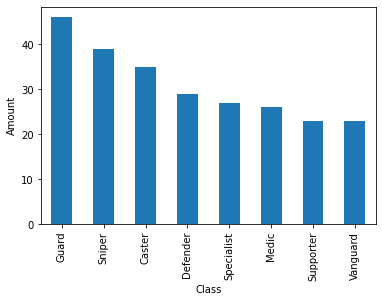

In [65]:
#visualizing data example

import pandas as pd
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

df_merge['Class'].value_counts().plot(ax=ax, kind='bar', xlabel='Class', ylabel='Amount')
plt.show()